In [1]:
import pandas as pd
import numpy as np

import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns

часть 1

In [2]:
#грузим первые данные

foto = pd.read_csv("5_task_1.csv")

In [3]:
foto

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


In [4]:
#через pingouin тестируем различие в дисперсиях

pg.homoscedasticity(data=foto, dv="events", group="group")

,W,pval,equal_var
levene,2.26226,0.104133,True


In [5]:
#через pingouin проверяем на нормальность распределения 

pg.normality(data=foto, dv="events", group="group", method="normaltest")

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


,W,pval,normal
A,2.103460,0.349333,True
B,0.841072,0.656695,True
C,3.243726,0.197530,True


In [6]:
#через pingouin считаем различия методом однофакторного дисперсионного анализа

pg.anova(data=foto, dv="events", between="group")

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


In [7]:
#тьюки
# вариант 'B' показывает  наилучший результат, так как по полю "diff" видно, 
# что наибольшие различия с другими вариантами дает именно вариант "B" 

pg.pairwise_tukey(data=foto, dv="events", between="group")

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.001,-0.806377
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.001,0.211712
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.001,1.018089


часть 2

In [8]:
df_button = pd.read_csv("5_task_2.csv")

In [9]:
df_button

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


In [10]:
df_button_test = df_button.query("group == 'test'")
# создание датафрейма, где данные только по тестовой группе

In [11]:
df_button_control = df_button.query("group == 'control'")
# создание датафрейма, где данные только по контрольной группе

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


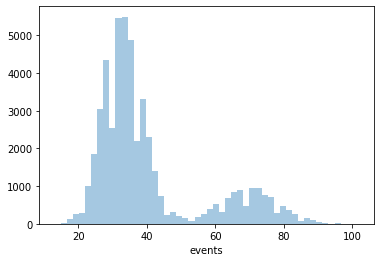

In [12]:
sns.distplot(df_button_test.events, kde = False)
# график в тестовой группе

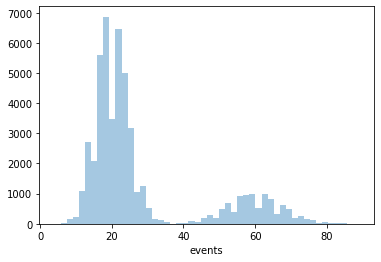

In [13]:
sns.distplot(df_button_control.events, kde = False)
# график в контрольной группе группе

In [14]:
# Посчитайте среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя. 

In [15]:
df_button.groupby(['group', 'segment']).describe()

id                                                     \
                   count        mean           std   min       25%      50%   
group   segment                                                               
control high     10000.0  50473.9782  28761.438914  10.0  25612.50  51031.0   
        low      40000.0  49935.2567  28855.849243   0.0  25022.25  49944.5   
test    high     10000.0  50126.6206  28821.133487  14.0  25317.50  50234.5   
        low      40000.0  49913.3436  28917.383492   1.0  24763.75  49706.5   

                                     events                                   \
                      75%      max    count       mean       std   min   25%   
group   segment                                                                
control high     75261.25  99976.0  10000.0  59.970800  7.805347  31.0  55.0   
        low      74874.25  99999.0  40000.0  20.031575  4.473576   4.0  17.0   
test    high     74783.25  99996.0  10000.0  69.938500  8.403974  40.0  64.0   
        low      75127.25  99995.0  40000.0  33.025925  5.720845  13.0  29.0   

                                    
                  50%   75%    max  
group   segment                     
control high     60.0  65.0   89.0  
        low      20.0  23.0   41.0  
test    high     70.0  76.0  102.0  
        low      33.0  37.0   59.0

In [16]:
round(7.805347, 2)

7.81

In [17]:
df_button

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


In [26]:
# Сначала мы используем функцию `smf.ols()` из `statsmodels` , где первым аргументом мы указываем формулу из прошлого
# задания, вторым - набор данных, а затем используем на ней метод `.fit()` .

# Результат мы даём в функцию `anova_lm` оттуда же и указываем аргумент `typ = 2` .

In [19]:
model_main = smf.ols("events ~ C(group) + C(segment)", data=df_button).fit()
anova_lm(model_main, typ=2)

,sum_sq,df,F,PR(>F)
C(group),3.837195e+06,1.0,110847.069301,0.0
C(segment),2.362480e+07,1.0,682461.847589,0.0
Residual,3.461598e+06,99997.0,NaN,NaN


In [27]:
df_button['combination'] = df_button.group + '\\' + df_button.segment
# создаем новую колонку combination, где имеется соотношение величин из 2 колонок group и segment

In [28]:
pg.pairwise_tukey(data=df_button, dv="events", between="combination")
#тьюки

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,control\high,control\low,59.970800,20.031575,39.939225,0.065432,610.391461,0.001,6.824282
1,control\high,test\high,59.970800,69.938500,-9.967700,0.082766,-120.432523,0.001,-1.703109
2,control\high,test\low,59.970800,33.025925,26.944875,0.065432,411.798717,0.001,4.603981
3,control\low,test\high,20.031575,69.938500,-49.906925,0.065432,-762.727892,0.001,-8.527429
4,control\low,test\low,20.031575,33.025925,-12.994350,0.041383,-314.002699,0.001,-2.220314
5,test\high,test\low,69.938500,33.025925,36.912575,0.065432,564.135148,0.001,6.307128


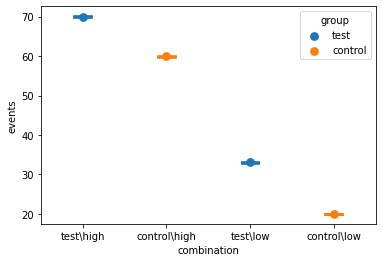

In [29]:
# график показывающий воздействие группы
sns.pointplot(x="combination", y="events", hue="group", data=df_button, capsize=0.2)

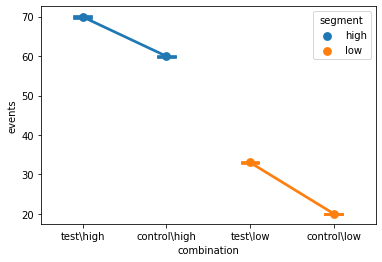

In [31]:
sns.pointplot(x="combination", y="events", hue="segment", data=df_button, capsize=0.2)
# график показывающий воздействие сегмента 